## Intensity Shapes
We're going to look at how erotically intense stories and story categories are. A GLM ensemble method was trained to discriminate between sexually-valenced comments and general-purpose Twitter data. See [this repository](https://github.com/morganecf/orb-of-disquiet) for more information. Each sentence of every story was scored using this model. The predictions give us a sense of how "erotically intense" a section of the story is. We can then graph erotic intensity over time for individual stories and as an aggregate across categories to see if stories or story types have a signature "shape." 

In [10]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
sentences = pd.read_csv('../data/literotica-stories/all-sentences-0.1.csv')
predictions = pd.read_csv('../data/literotica-stories/hub_glm_predictions_all-sentences-0.1.csv')

In [3]:
sentences['prediction'] = predictions['Prediction']
sentences

Unnamed: 0                    category  \
0                 0                adult-how-to   
1                 1                adult-how-to   
2                 2                adult-how-to   
3                 3                adult-how-to   
4                 4                adult-how-to   
5                 5                adult-how-to   
6                 6                adult-how-to   
7                 7                adult-how-to   
8                 8                adult-how-to   
9                 9                adult-how-to   
10               10                adult-how-to   
11               11                adult-how-to   
12               12                adult-how-to   
13               13                adult-how-to   
14               14                adult-how-to   
15               15                adult-how-to   
16               16                adult-how-to   
17               17                adult-how-to   
18               18                adult-how-to   
19               19                adult-how-to   
20               20                adult-how-to   
21               21                adult-how-to   
22               22                adult-how-to   
23               23                adult-how-to   
24               24                adult-how-to   
25               25                adult-how-to   
26               26                adult-how-to   
27               27                adult-how-to   
28               28                adult-how-to   
29               29                adult-how-to   
...             ...                         ...   
1561254     1561254  transsexuals-crossdressers   
1561255     1561255  transsexuals-crossdressers   
1561256     1561256  transsexuals-crossdressers   
1561257     1561257  transsexuals-crossdressers   
1561258     1561258  transsexuals-crossdressers   
1561259     1561259  transsexuals-crossdressers   
1561260     1561260  transsexuals-crossdressers   
1561261     1561261  transsexuals-crossdressers   
1561262     1561262  transsexuals-crossdressers   
1561263     1561263  transsexuals-crossdressers   
1561264     1561264  transsexuals-crossdressers   
1561265     1561265  transsexuals-crossdressers   
1561266     1561266  transsexuals-crossdressers   
1561267     1561267  transsexuals-crossdressers   
1561268     1561268  transsexuals-crossdressers   
1561269     1561269  transsexuals-crossdressers   
1561270     1561270  transsexuals-crossdressers   
1561271     1561271  transsexuals-crossdressers   
1561272     1561272  transsexuals-crossdressers   
1561273     1561273  transsexuals-crossdressers   
1561274     1561274  transsexuals-crossdressers   
1561275     1561275  transsexuals-crossdressers   
1561276     1561276  transsexuals-crossdressers   
1561277     1561277  transsexuals-crossdressers   
1561278     1561278  transsexuals-crossdressers   
1561279     1561279  transsexuals-crossdressers   
1561280     1561280  transsexuals-crossdressers   
1561281     1561281  transsexuals-crossdressers   
1561282     1561282  transsexuals-crossdressers   
1561283     1561283  transsexuals-crossdressers   

                                                      text  \
0        One of my favorite additional tools is a pair ...   
1        Not the one size fits all... these are my size...   
2                     They are medical examination gloves.   
3        I probably have sixty pairs left... they're ye...   
4        Examination gloves are for giving handjobs... ...   
5                                             Wink at him.   
6        Squirt a big puddle in one palm, enough to dri...   
7                                           The backs too.   
8                                           And touch him.   
9                                                     Yum.   
10          What a great, and pleasant way to hold a cock.   
11       You don't have to put both gloves on, but I li...   
12                        Just how smoot

In [4]:
by_category = sentences.groupby('category')

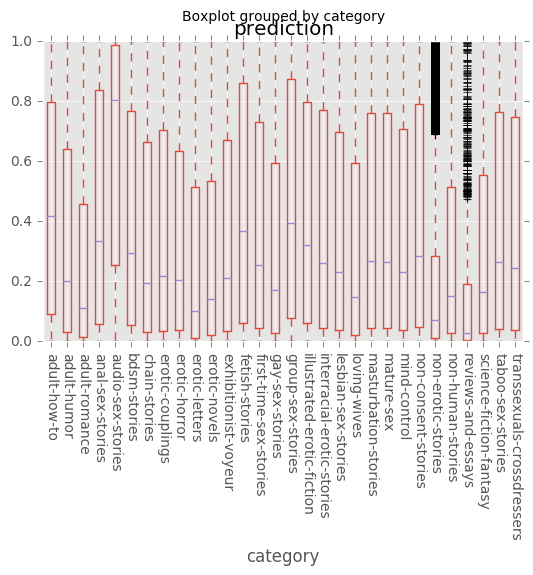

In [12]:
# Interestingly, looks like the median sentence across most categories is non-erotic
# except for audio-sex-stories. Ones that are a bit more erotic are adult-how-to, 
# fetish-stories, and group-sex. The least erotic are non erotic stories, erotic letters,
# and adult romance. 
sentences.boxplot(column='prediction', by='category', rot=-90)

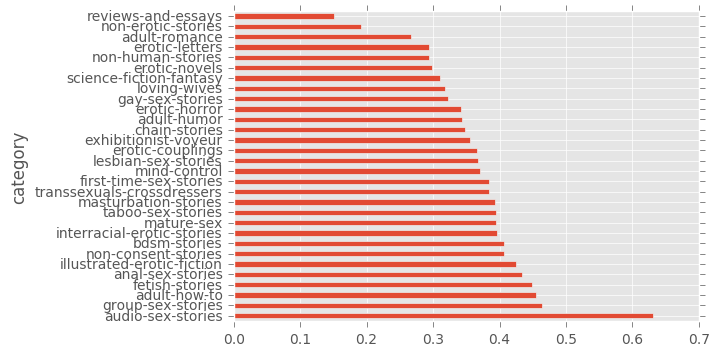

In [14]:
# Sort by averages  -- confirmation of same
by_sorted_avg_intensity = by_category.mean().sort_values('prediction', ascending=False).prediction
by_sorted_avg_intensity.plot.barh()

In [35]:
# The story is much different when we weight sentiment by number of unique titles.
weighted = (by_category.mean().prediction * by_category.title.nunique()).sort_values(ascending=False)
weighted.head()

category
science-fiction-fantasy       95.247146
taboo-sex-stories             87.201056
interracial-erotic-stories    83.840651
non-human-stories             80.920628
transsexuals-crossdressers    80.592035
dtype: float64

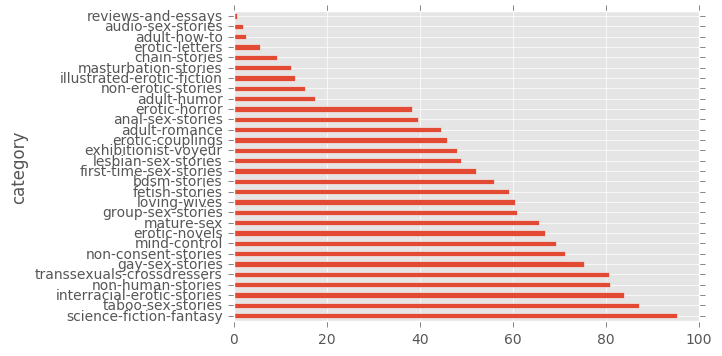

In [38]:
weighted.plot.barh()

In [39]:
# It's clear that audio sex stories were only high-intensity because there are only 3 of them
by_category.get_group('audio-sex-stories').title.nunique()

3

In [41]:
# Whereas there are 100x as many science fiction stories
by_category.get_group('science-fiction-fantasy').title.nunique()

307

In [18]:
# Plot the distribution of intensity of a particular story
sentences[sentences.title == 'the-art-gallery-1'].head()

Unnamed: 0      category  \
0           0  adult-how-to   
1           1  adult-how-to   
2           2  adult-how-to   
3           3  adult-how-to   
4           4  adult-how-to   

                                                text              title  \
0  One of my favorite additional tools is a pair ...  the-art-gallery-1   
1  Not the one size fits all... these are my size...  the-art-gallery-1   
2               They are medical examination gloves.  the-art-gallery-1   
3  I probably have sixty pairs left... they're ye...  the-art-gallery-1   
4  Examination gloves are for giving handjobs... ...  the-art-gallery-1   

   prediction  
0    0.472654  
1    0.637693  
2    0.162631  
3    0.042583  
4    0.155265

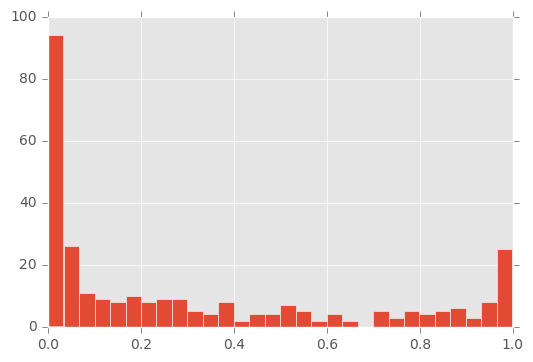

In [69]:
horror[horror.title == 'an-eye-for-an-eye-3'].prediction.hist(bins=30)

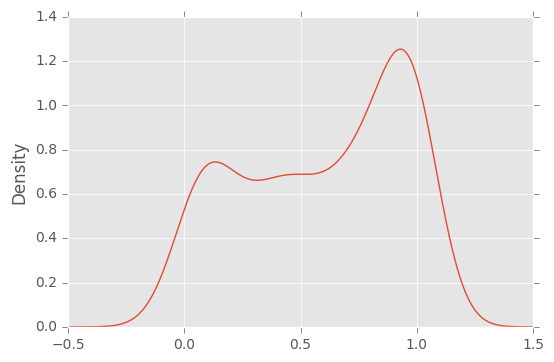

In [49]:
# kernel density estimate plot -- this gives an estimate distribution of sentiment in the story
# but IGNORES temporal sequence of sentences -- estimates probability density. 
sentences[sentences.title == 'the-art-gallery-1'].prediction.plot.density()

In [50]:
humor = by_category.get_group('adult-humor')
humor.title.nunique()

51

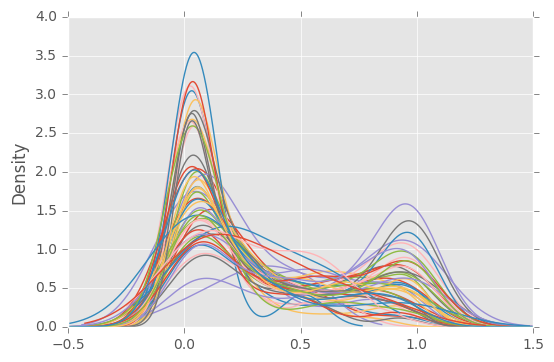

In [51]:
for title, story in humor.groupby('title'):
    story.prediction.plot.density()

In [48]:
sentences[sentences.title == 'the-art-gallery-1'].prediction.min()

0.0028490248218300002

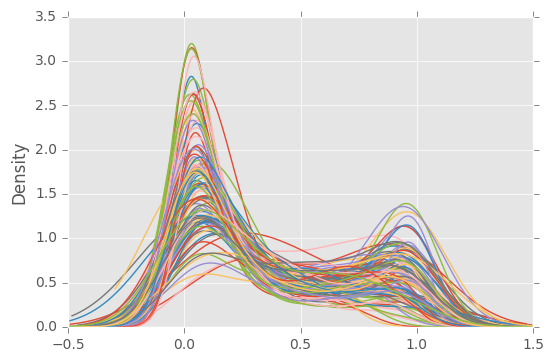

In [57]:
# Let's see if erotic-horror has a different shape. Again, this should not be read as a
# temporal or sequential shape. 
horror = by_category.get_group('erotic-horror')
for title, story in horror.groupby('title'):
    if len(story.prediction) > 1:
        story.prediction.plot.density()
    
# They are remarkably similar.

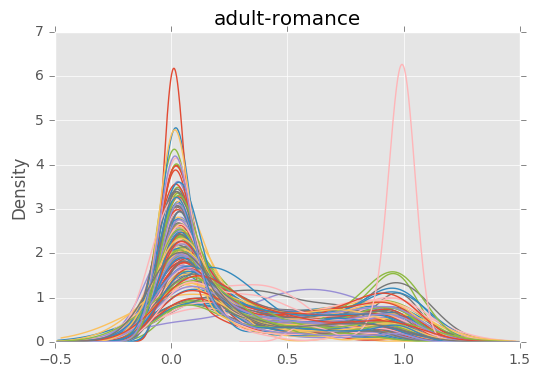

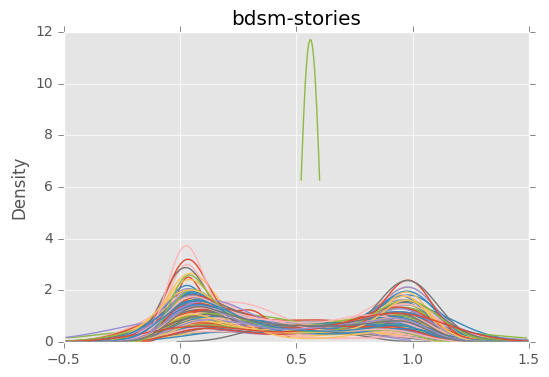

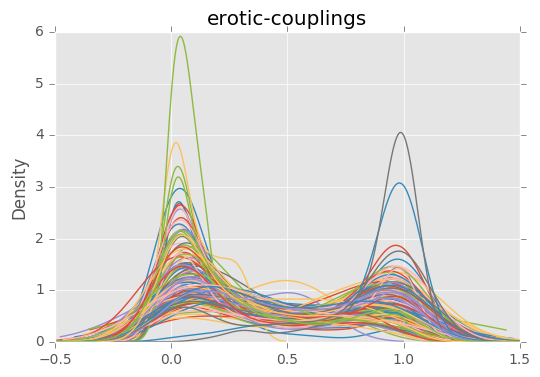

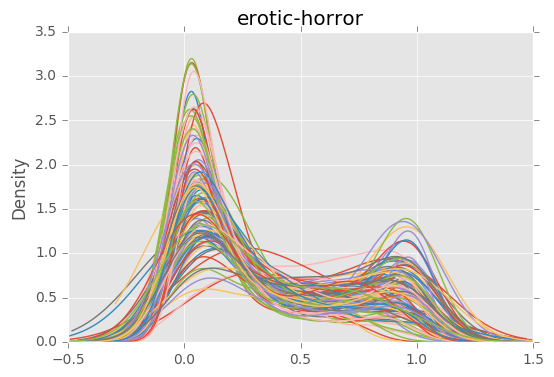

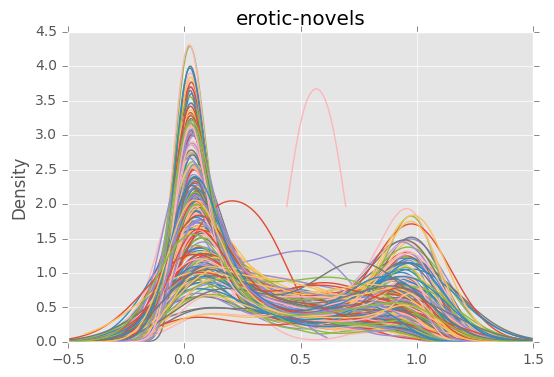

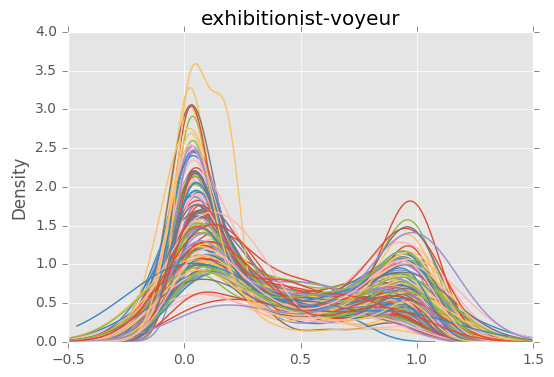

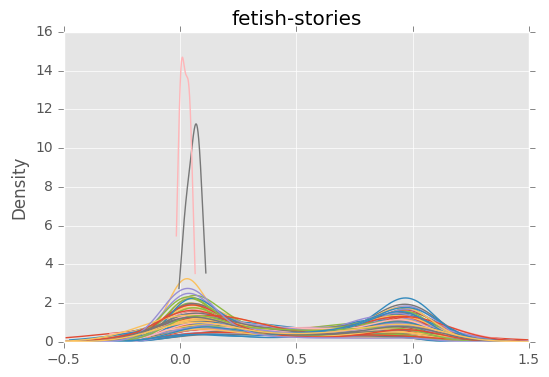

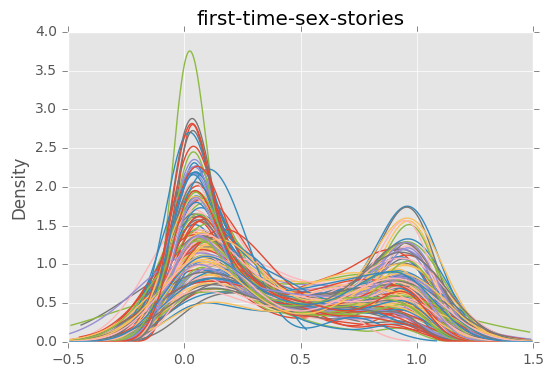

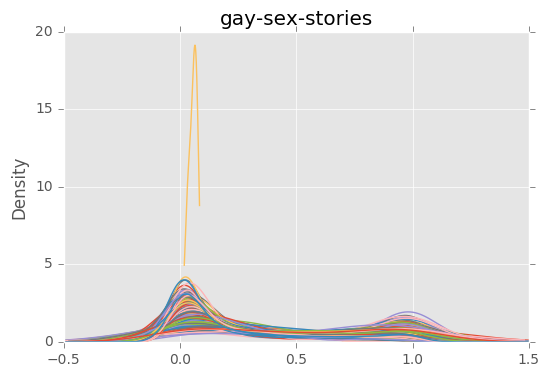

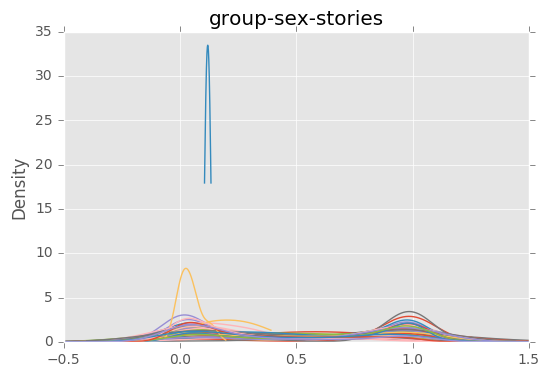

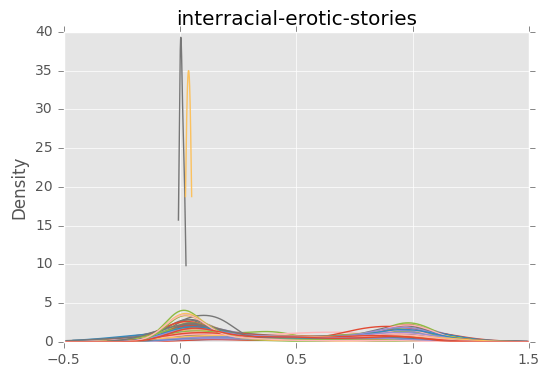

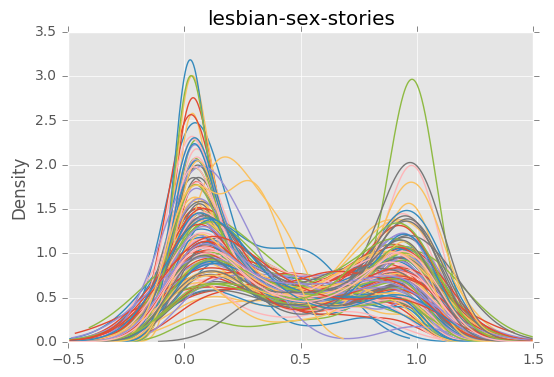

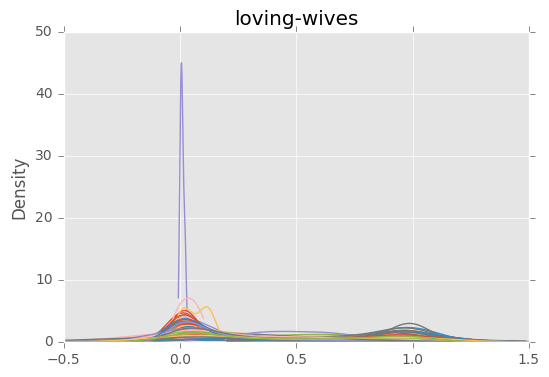

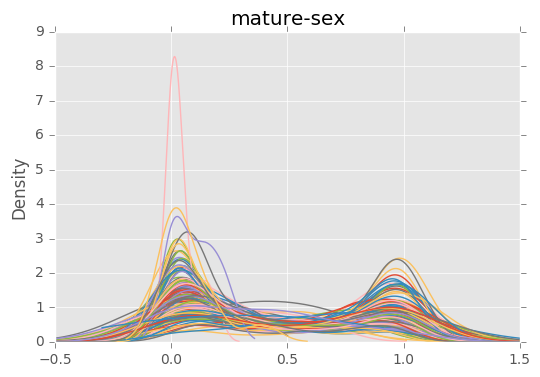

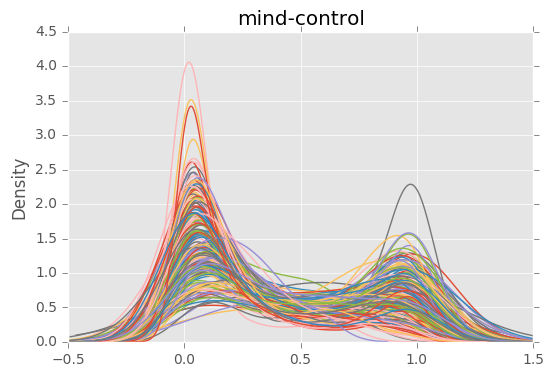

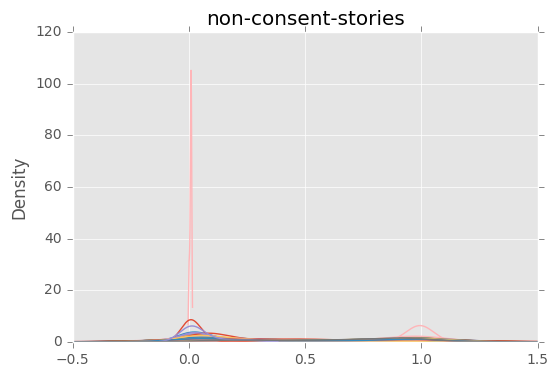

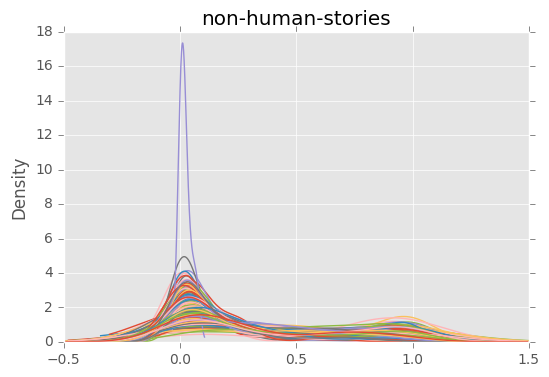

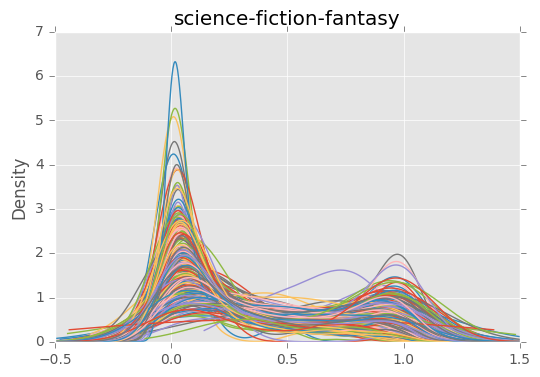

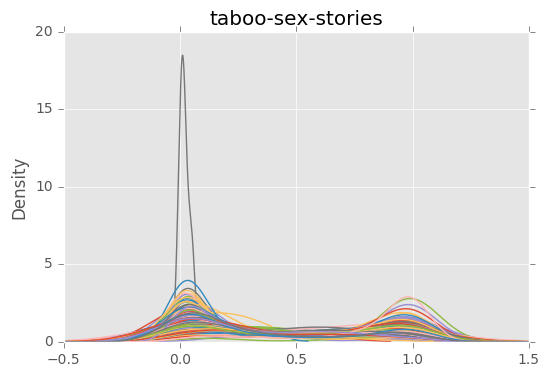

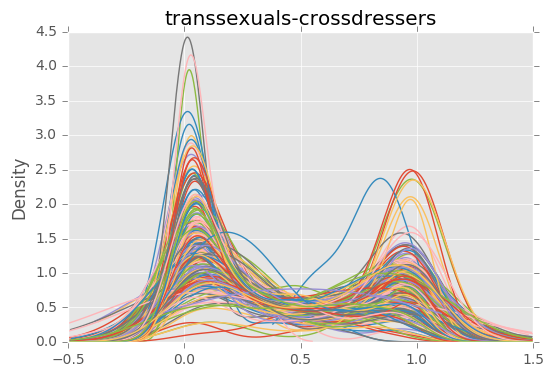

In [59]:
for category, group in by_category:
    if (group.title.nunique() > 100):
        plt.figure()
        for title, story in group.groupby('title'):
            if len(story.prediction) > 1:
                story.prediction.plot.density().set_title(category)

### Density estimators for intensity across categories
It seems like most stories have a bimodal distribution of erotic sentiment. The modes are centered around ~0 (fully non-erotic) and ~1 (fully erotic). Again, this is **not** a series. This is an approximation of the probability density of erotic sentiment across each story. Many of these are skewed towards non-erotic sentiment, meaning the near-zero (non-erotic) hump is much larger than the near-1 (erotic) hump. This makes sense: sexual action probably peaks in certain areas of the story, while the rest of the story is about setting up the plot/characters/setting/etc. The model used to score predictions was trained against general-purpose twitter sentiment data, so it might be better at picking up on emotional sentiment (whether erotic or not) as a negative class over regular non-valenced language. All categories seem bimodal, but categories that stand out as being less skewed and more balanced (having nearly equal parts erotic/non-erotic sentiment) are: bdsm, fetish, group sex, interracial, loving wives, non-consent, and taboo sex. 

**TODO**: train model against general-purpose story data instead of twitter data. 

### Intensity series 
Now we're going to plot intensity sequentially to see how erotic sentiment changes as a story progresses. Since just plotting sentiment gets very chaotic, we want to somehow smooth the data. We can do this in several ways:
1. Take local averages: a moving average, i.e., bin in a small window around current point
2. Take weighted local average: larger window, but weight points closer to the current point higher
3. Filter: use points strictly from the future -- weight function is centered around current point and decays as you move away from point. Ex: Gaussian function decays exponentially.

Pandas wraps around these [scipy window functions](https://docs.scipy.org/doc/scipy/reference/signal.html#window-functions). A triangle window, for example, is just one where the filter pass looks like a triangle, decaying linearly on both sides of the current point. 

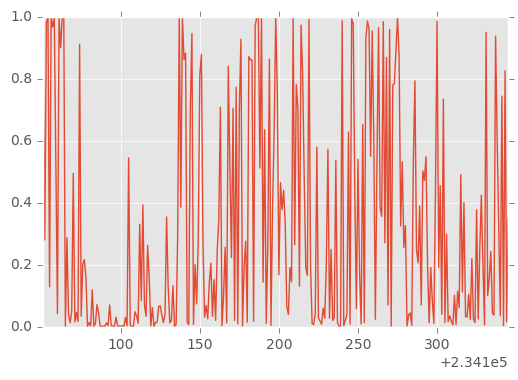

In [70]:
# chaotic!
eye_story = horror[horror.title == 'an-eye-for-an-eye-3']
eye_story.prediction.plot()

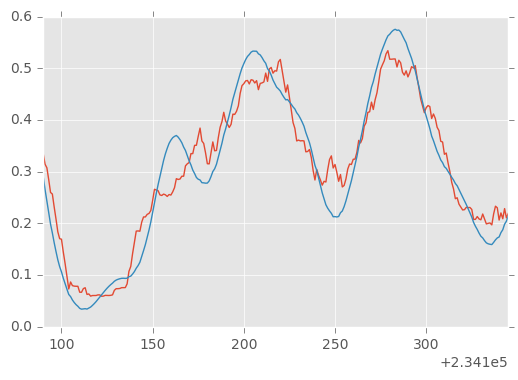

In [147]:
WINDOW_SIZE = 40

# Using a local window of size WINDOW_SIZE. Hamming distance gives smoother shapes. 
eye_story.prediction.rolling(WINDOW_SIZE).mean().dropna().plot()
eye_story.prediction.rolling(WINDOW_SIZE, win_type='hamming').mean().dropna().plot()

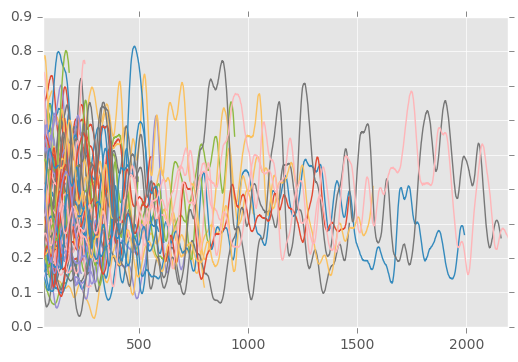

In [164]:
WINDOW_SIZE = 60

# Now plot the rolling average across all stories in erotic-horror
def plot_rolling_average_across_category(category, window_size=WINDOW_SIZE):
    group = by_category.get_group(category)
    for title, story in group.groupby('title'):
        story = story.reset_index()
        data = story.prediction.rolling(window_size, win_type='hamming').mean().dropna()
        if len(data) > 0:
            data.plot()

plot_rolling_average_across_category('erotic-horror')

# Well...that's pretty noisy.

In [165]:
by_category.groups.keys()

dict_keys(['mind-control', 'erotic-horror', 'group-sex-stories', 'non-consent-stories', 'lesbian-sex-stories', 'transsexuals-crossdressers', 'exhibitionist-voyeur', 'non-human-stories', 'mature-sex', 'non-erotic-stories', 'erotic-novels', 'loving-wives', 'masturbation-stories', 'science-fiction-fantasy', 'audio-sex-stories', 'taboo-sex-stories', 'fetish-stories', 'chain-stories', 'adult-how-to', 'anal-sex-stories', 'adult-humor', 'adult-romance', 'gay-sex-stories', 'erotic-couplings', 'bdsm-stories', 'reviews-and-essays', 'first-time-sex-stories', 'illustrated-erotic-fiction', 'interracial-erotic-stories', 'erotic-letters'])

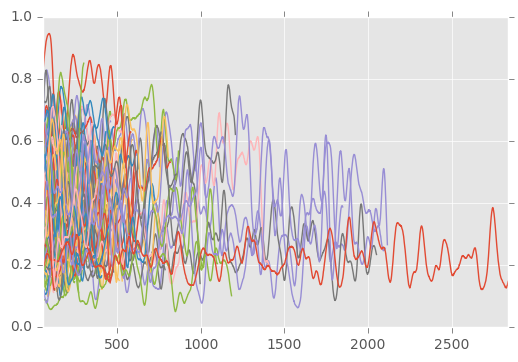

In [166]:
plot_rolling_average_across_category('mind-control')

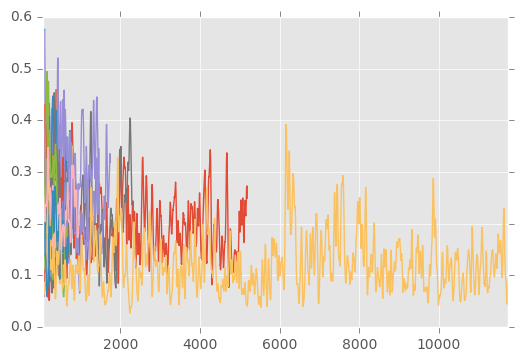

In [169]:
plot_rolling_average_across_category('non-erotic-stories')

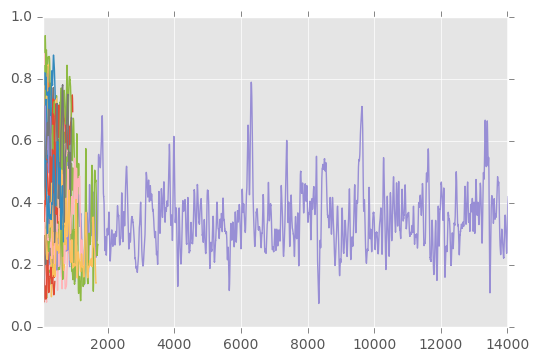

In [173]:
plot_rolling_average_across_category('bdsm-stories')

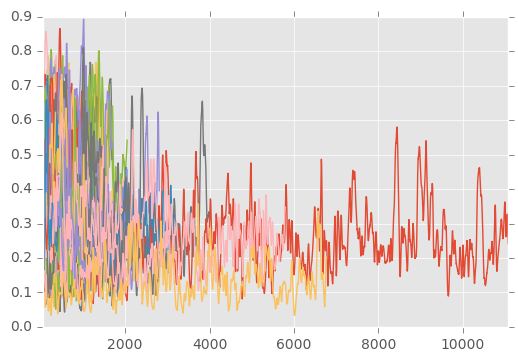

In [163]:
plot_rolling_average_across_category('science-fiction-fantasy')

It seems like there could be a general trend where stories start off fluctuating between high- and low-intensity and then sort of taper off near the end. I would have expected more of a bell shape: stories start out non-erotic, peak during some erotic climax, then get less erotic during/after the denouement. But it's hard to compare across stories because some stories are much longer than others. So let's arrange these into quantiles and compare across quantiles.

In [222]:
# Example with one horror story and 10 quantiles
eye_story = horror[horror.title == 'an-eye-for-an-eye-3'].reset_index()
cut = pd.qcut(eye_story.index, 10)
eye_story['quantile'] = cut.codes
quantiles = eye_story.groupby('quantile').mean().sort_index().prediction
quantiles

# So in the first 10% of the data, the avg intensity is 0.43. In the last 10% of the data,
# the avg intensity is 0.25. 

quantile
0    0.437638
1    0.035206
2    0.167505
3    0.314617
4    0.512890
5    0.357112
6    0.317300
7    0.521982
8    0.239578
9    0.253841
Name: prediction, dtype: float64

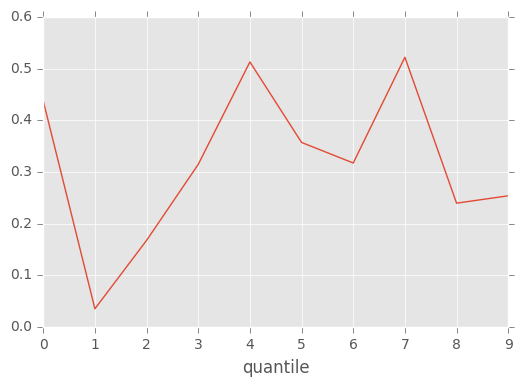

In [226]:
quantiles.plot()

# This particular story starts off with medium erotic intensity, plunges down to 

In [238]:
# Beginning, middle, and end
NUM_QUANTILES = 3

def plot_quantiles_per_category(category):
    group = by_category.get_group(category)
    for title, story in group.groupby('title'):
        story = story.reset_index()
        try:
            cut = pd.qcut(story.index, NUM_QUANTILES)
            story['quantile'] = cut.codes
            quantiles = story.groupby('quantile').mean().sort_index().prediction
            quantiles.plot()
        except:
            continue

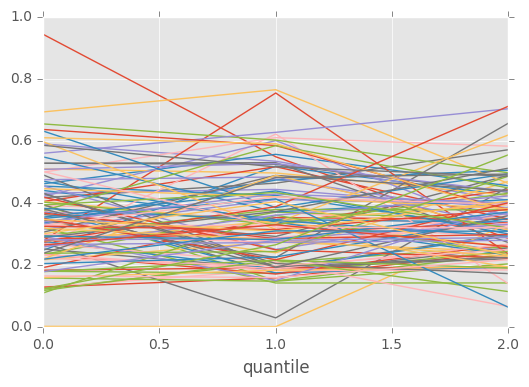

In [239]:
plot_quantiles_per_category('erotic-horror')

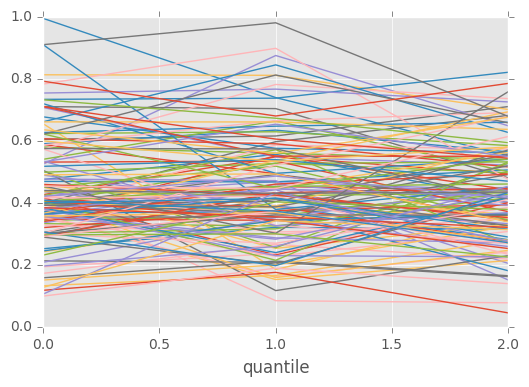

In [240]:
plot_quantiles_per_category('bdsm-stories')

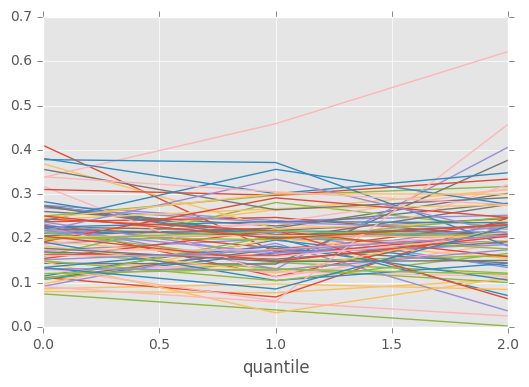

In [241]:
plot_quantiles_per_category('non-erotic-stories')

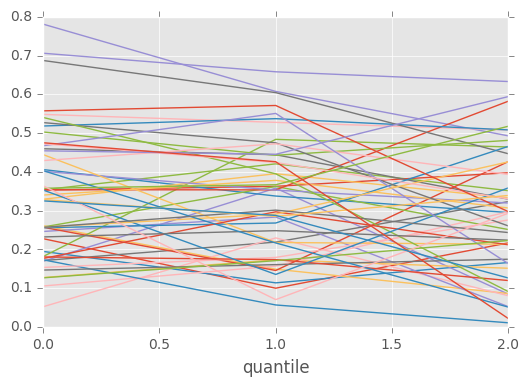

In [242]:
plot_quantiles_per_category('adult-humor')

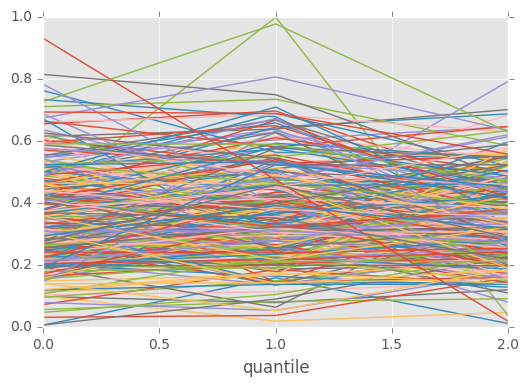

In [243]:
plot_quantiles_per_category('science-fiction-fantasy')

In [244]:
# Well...no real discernible trend here...